In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import json
from pathlib import Path
from sklearn import linear_model

In [11]:
!ls baselines

best_12-7			  red_gym_env.py	    run_baseline.py
grinds_to_level_11_extra_time_14  requirements.txt	    session_eb0108d3
__pycache__			  run_baseline_parallel.py  session_fe9ae9f0


In [7]:
def load_run_data(run_path):
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
    print(f'runs loaded: {len(all_runs)}')
    return all_runs

In [46]:
def plot_runs(all_runs, plot_line=False, use_keys=None, start=0, group_runs=1):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs)//group_runs)
    
    def add_plot(y, name, alpha, size, plot_line):
        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            regr = linear_model.LinearRegression()
            # Optimize linear model
            regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

            # Make predictions using the testing set
            lin_y = regr.predict(x.reshape(-1, 1))
            plt.plot(x, lin_y, linewidth=3)
        
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    if group_runs:
        for m, dat in metrics.items():
            metrics[m] = np.array(dat).reshape(-1, group_runs).mean(1)
    available_keys = metrics.keys()
    print(f'available metrics: {list(available_keys)}')
    if use_keys is None:
        use_keys = available_keys
    
    ## TODO subplot for each metric ## 
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 15.0, plot_line
        )
        
    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

runs loaded: 192
available metrics: ['events', 'seen_poke', 'party_xp', 'levels', 'explore', 'total']


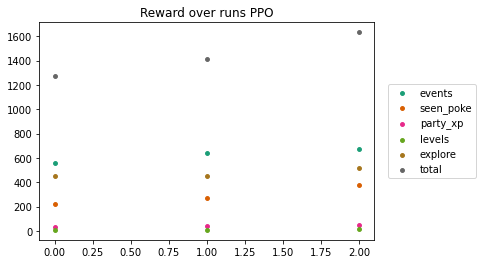

In [47]:
plot_runs(
    load_run_data('baselines/session_eb0108d3'), 
    use_keys=None, 
    plot_line=False,
    start=0,
    group_runs=64
)
